## <img src="https://img.icons8.com/color/48/000000/code.png" style="height:50px;display:inline"> Python - Parkinson's Disease Classification Data Analysis

In this exercise, we are going to do data analysis with Python and Pandas. As this is the first "real" exercise, we will add guidance for some of the tasks.

1. Warmup - Generate 100 samples from $\mathcal{N}(0,1)$ (`np.random.randn`). Compute a 95% CI for the CDF. Plot the true CDF, the CDF estimation and the CI in a single plot. To estimate $\hat{F}_n$ use a histogram (`np.histogram`). Repeat this $K=1000$ times and compute the percentage of time that the interval contained the CDF (print the value) . In addition, plot in another single figure the *true* CDF, and the best and worst experiments (use $\max_x|F(x) - \hat{F}_n(x)|$ as quality measure).
    * To compare np arrays element-wise use `np.less_equal(x1, x2 + eps), np.greater_equal(x1, x2 - eps)`, use `.all()` to verify if all the comaprisons were `True`.
    
We are now going to perform some real data analysis on the "Parkinson's Disease Classification Data Set": the data used in this study were gathered from 188 patients with PD (107 men and 81 women) with ages ranging from 33 to 87 at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine, Istanbul University. The control group consists of 64 healthy individuals (23 men and 41 women) with ages varying between 41 and 82. During the data collection process, the microphone is set to 44.1 KHz and following the examination, the sustained phonation of the vowel /a/ was collected from each subject with three repetitions. 

The features are various speech signal processing algorithms including Time Frequency Features, Mel Frequency Cepstral Coefficients (MFCCs), Wavelet Transform based Features, Vocal Fold Features and TWQT features have been applied to the speech recordings of Parkinson's Disease (PD) patients to extract clinically useful information for PD assessment.

2. Load the data with pandas, drop the 'id' column, take a sample ($k=10$, `dataframe.sample(k)`) and view it.
    * The filename is `pd_speech_features.csv`.
3. Compute the empirical correlation between all pairs of features. Show the results both in a heatmap.
    * Use pandas `.corr()` to calculate the correaltion, and `plt.imshow()` to view the heatmap (2 heatmaps, one for the correlation and one for the absolute correlation). Add a color bar using `plt.colorbar()`
4. Print the top-20 most correlated features. Follow this steps:
    * Take the lower triangle of the correlation matrix (as it is symmetrical and we don't care about $Corr(X_i,X_i)$). Use `np.tril()`
    * Consider only positive correlation (because negative correlation has a different, useful meaning). You can do that by `X = X[X >0]`.
    * From here, these are recommended steps, feel free to achieve the goal in a different way.
        * Assignment to a pandas DataFrame: `X.loc[:,:] = np.(...)`
        * Unstacking the DataFrame (creates a new pivot, read the doc): `df.unstack()`
        * Sorting: `df.sort()`

5. What is the meaning when 2 different features are highly correlated? From a machine learning perspective, can a classifier learn new insights from highly-correlated features? In your answer, address the process of "feature selection" in ML (usually performed as a pre-processing step).

6. Compute the **in-class** correlation between features. Plot a heat map for each class. Address the differences between the heat maps.

7. Consider the features 'numPulses' and 'app_entropy_log_5_coef'. We wish to calculate a 95% confidence interval for the correlation between these features. We will use *Bootstrapping* and the *Chebyshev inequality* (as in Tutorial 2).
    * Implement the bootstrap algorithm to calculate the standard deviation ($\sigma$) of the correlation.
        * You can use the algorithm from the tutorial, but you have to modify it to support 2 arrays.
        * The algorithm will output the empirical correlation of the two input features, and a bootstrap estimation for the std ($\sigma$). Use `K=300` bootstrap samples and `m=100` experiments.
        * Tips:
            * To get values for two columns: `data[['numPulses', 'app_entropy_log_5_coef']]`
            * To calculate correlation, check out `numpy.corrcoef`.
    * Use $\sigma$ to calculate a 95% CI using Chebyshev inequality.
        * Remember to to normalize by the size of the data ($N$).
    The final print should look something like that: `95% confidence interval for the correlation: *** ± ***`

In [10]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from scipy.stats import norm
import helpers as h


%matplotlib inline


plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 10


## Q1

The precantage of the estimators that were inside the CI is: 94.60%


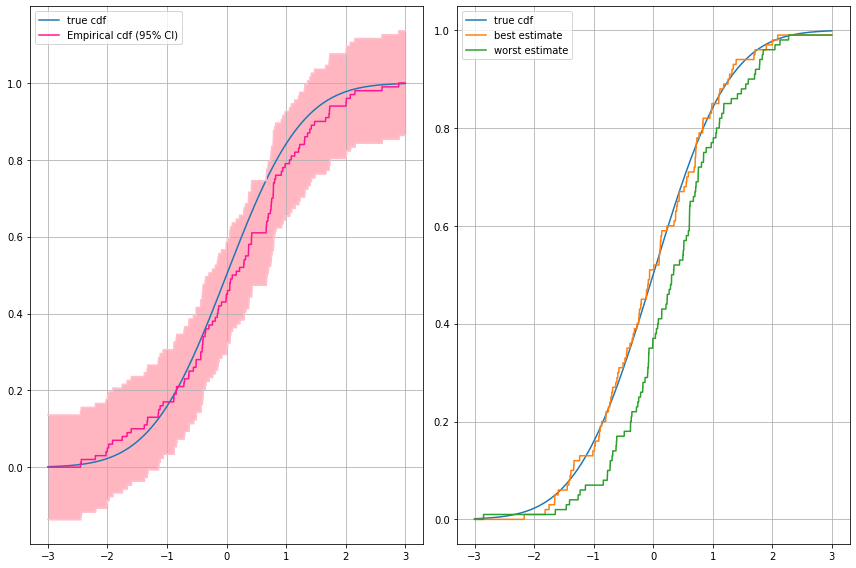

In [11]:
N = 100
x = np.arange(-3,3+0.001,0.001)
x.shape
mu = 0
sigma = 1
 
true_cdf = norm.cdf(x, mu, sigma)

k = 1000
count = 0 # counts the number of times the true cdf is inside the CI
norm_list = []
for i in range(k):
    # First calc F estimated and CI  and check if F real is inside the CI
    F_n, F_ci_down, F_ci_up, x_est = h.calc_plot_CI(0.05, N)
    count += 1*((np.greater_equal(true_cdf, F_ci_down).all()) and (np.less_equal(true_cdf, F_ci_up).all()))

    # Now look for the best and worst estimation of F
    norm_list.append((x_est, F_n,LA.norm(true_cdf-F_n)))

print(f"The precantage of the estimators that were inside the CI is: {count/k * 100:.2f}%")

# sort norm_list by norm:
norm_list.sort(key=lambda x:x[2])
best_est = (norm_list[0][0], norm_list[0][1])
worst_est = (norm_list[-1][0], norm_list[-1][1])

# plot figures:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(x, true_cdf, label='true cdf')
h.calc_plot_CI(0.05, N, plot=True, ax=ax)

ax = fig.add_subplot(1,2,2)
ax.plot(x, true_cdf, label='true cdf')
ax.plot(best_est[0][1:], best_est[1], label='best estimate')
ax.plot(worst_est[0][1:], worst_est[1], label='worst estimate')
ax.legend()

plt.tight_layout()

# Data Analysis part:

## q1 - load the data, drop the id column and sample the data

In [12]:
df = pd.read_csv('pd_speech_features.csv')
df.drop(columns='id', inplace=True)
df.sample(n=10)


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
297,1,0.83914,0.66460,0.40691,339,338,0.005699,0.000047,0.00085,0.000005,...,3.6318,3.5206,2.7735,2.8380,2.8291,3.3041,2.4720,2.2038,2.5474,1
280,1,0.84221,0.73829,0.37431,351,350,0.005502,0.000090,0.00143,0.000008,...,145.5554,71.5580,32.1470,20.0325,16.6890,17.3619,15.0147,11.3632,4.7905,1
225,0,0.80262,0.80754,0.39255,329,328,0.005865,0.000030,0.00073,0.000004,...,3.6220,3.4087,3.7320,4.5514,2.7882,2.6902,2.3387,2.3601,3.4241,0
162,1,0.83898,0.78840,0.51758,266,265,0.007252,0.000210,0.00163,0.000012,...,8.7667,4.5829,3.1466,3.7875,7.7467,7.3511,14.0657,23.8112,56.9072,1
455,0,0.69930,0.63347,0.81889,140,131,0.010975,0.001643,0.00870,0.000096,...,2.7126,2.6834,2.6807,4.0608,3.1370,3.6320,5.8134,3.4760,30.6486,1
519,1,0.79865,0.57376,0.47711,347,346,0.005572,0.000058,0.00096,0.000005,...,4.1005,3.3895,2.5501,2.6555,2.7239,2.2796,2.5760,2.5895,3.4479,0
604,0,0.80643,0.72731,0.59829,428,426,0.004500,0.000970,0.00132,0.000006,...,2.3503,3.8087,4.7022,4.8738,5.1649,2.8838,4.2563,4.6500,11.7712,1
682,1,0.79400,0.74376,0.67749,196,195,0.009813,0.000178,0.00482,0.000047,...,2.1029,2.1280,3.2803,6.7456,3.3846,3.7920,6.4522,6.8683,23.7145,1
643,1,0.60761,0.72552,0.82679,185,178,0.006670,0.002244,0.01854,0.000124,...,1.6281,104.7072,109.5992,88.3230,71.4449,63.1970,55.9222,48.8600,95.2184,1
655,1,0.77405,0.73552,0.51068,232,231,0.008308,0.000073,0.00216,0.000018,...,1.6965,4.0226,31.1465,24.6262,25.6239,40.7528,33.8346,32.0710,84.3844,1


## q2 - compute correlation between features

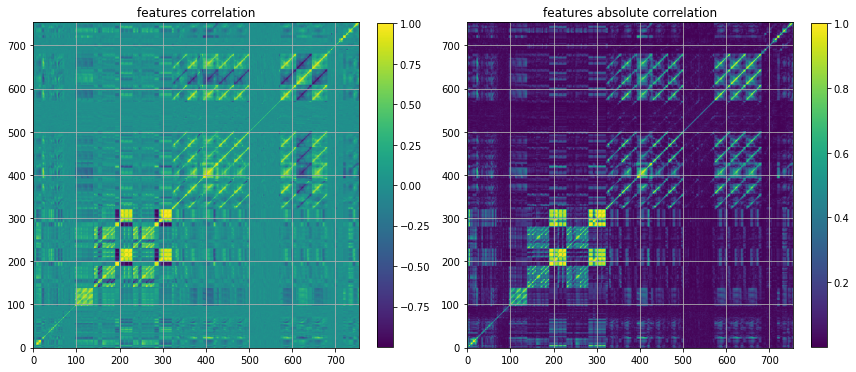

In [13]:
corr = df.corr()
fig, ax = plt.subplots(1,2)

# Plot correlation between features
im = ax[0].imshow(corr)
fig.colorbar(im, fraction = 0.045,ax=ax[0])
ax[0].set_title('features correlation')
ax[0].invert_yaxis()


# Plot absolute correlation between features
im = ax[1].imshow(abs(corr))
fig.colorbar(im, fraction=0.045,ax=ax[1])
ax[1].set_title('features absolute correlation')
ax[1].invert_yaxis()

fig.tight_layout()


## q3 - Print the top 20 most correlated features

In [14]:
corr = df.corr()
corr.loc[:,:] = np.tril(corr.values, k=-1)
unstacked_corr = corr.unstack()
sorted_corr_ser = unstacked_corr.sort_values(ascending=False)
print(f"The top 20 most correlated features are:\n{sorted_corr_ser[:20]}")




The top 20 most correlated features are:
apq3Shimmer                    ddaShimmer                        1.000000
app_LT_entropy_log_8_coef      app_LT_entropy_log_9_coef         1.000000
app_LT_entropy_shannon_8_coef  app_LT_entropy_shannon_9_coef     1.000000
app_entropy_log_8_coef         app_entropy_log_9_coef            1.000000
app_LT_entropy_log_9_coef      app_LT_entropy_log_10_coef        1.000000
app_LT_entropy_shannon_9_coef  app_LT_entropy_shannon_10_coef    0.999999
app_LT_entropy_log_8_coef      app_LT_entropy_log_10_coef        0.999999
app_entropy_shannon_8_coef     app_entropy_shannon_9_coef        0.999999
app_LT_entropy_shannon_8_coef  app_LT_entropy_shannon_10_coef    0.999999
app_entropy_shannon_9_coef     app_entropy_shannon_10_coef       0.999997
rapJitter                      ddpJitter                         0.999996
app_entropy_shannon_8_coef     app_entropy_shannon_10_coef       0.999995
app_LT_TKEO_mean_8_coef        app_LT_TKEO_mean_9_coef           0.9999

## High correlation between 2 features is not good especially for linear models like regression models, svm, logistic regression etc...
## if 2 features are highly correlated then the model will have hard time to "understand" the importance of each feature individualy and thats
## why we would like to remove one of the high correlated feature.
  

## q5 - Plot the in-class features correlation

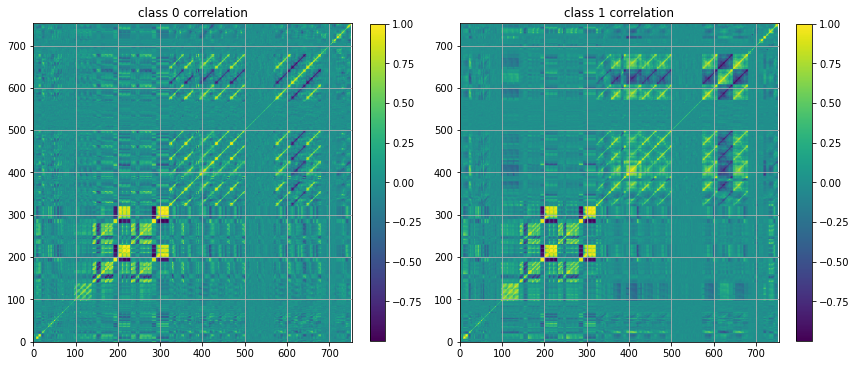

In [15]:
df_0_corr, df_1_corr = df[df['class']==0].corr(), df[df['class']==1].corr()

fig, ax = plt.subplots(1,2)

im = ax[0].imshow(df_0_corr)
fig.colorbar(im, ax=ax[0], fraction = 0.045)
ax[0].invert_yaxis()
ax[0].set_title('class 0 correlation')

im = ax[1].imshow(df_1_corr)
fig.colorbar(im, ax=ax[1], fraction = 0.045)
ax[1].invert_yaxis()
ax[1].set_title('class 1 correlation')

fig.tight_layout()

 

## Insights:
* In class 1 there are more high correlated features than in class 0.
* In class 0 there are more low correlated features than in class 1.

# q6 - Calculate empirical correlation and it's std for 2 features using bootstrp

In [17]:
x = df[['numPulses', 'app_entropy_log_5_coef']].values
#k = int(0.5*x.shape[0])
k = 300
m = 100
emp_corr, std_emp_corr, corr_list = h.corr_bootstrap(x, k, m)
print(f"The emperical correlation is: {emp_corr:.3f}")
print(f"The std of the emperical correlation is: {std_emp_corr:.3f}")

# calculate CI using Chebyshev inequality:
alpha = 0.05
mean = np.mean(corr_list)
eps = std_emp_corr/np.sqrt(alpha*N) # we get it by comparing the right side of the inequality to alpha
print(f"The 95% Confidence interval is: [{mean-eps:.3f}, {mean+eps:.3f}]")


The emperical correlation is: 0.865
The std of the emperical correlation is: 0.025
The 95% Confidence interval is: [0.856, 0.878]
